***Regresja liniowa jedenj zmiennej***

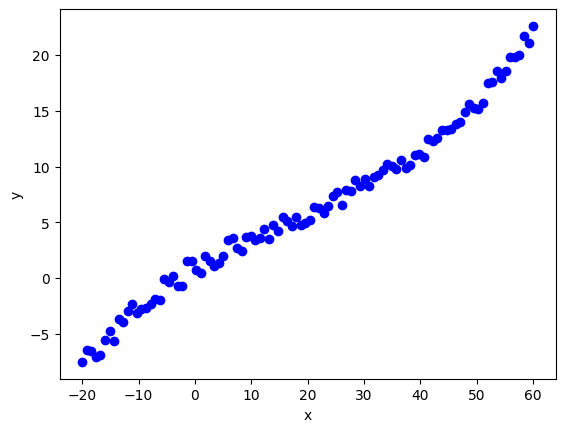

In [157]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt


with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

x = data[:, 0]
y = data[:, 1]

# Tworzenie wykresu
plt.scatter(x, y, color="blue" )  
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Funkcja kosztu na początku: 47.634876


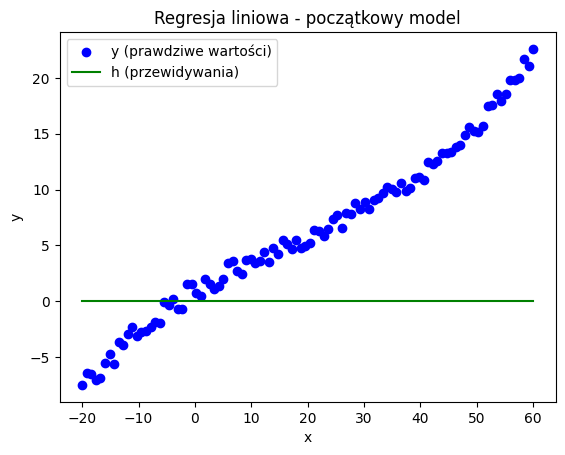

In [158]:

def h_fun(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    # todo
    return theta_0+theta_1*x

def calculate_cost(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    # todo
    m = len(x)
    cost = (1/(2*m))*np.sum((h_fun(x, theta_0, theta_1) - y)**2)
    return cost

eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

# Obliczenie wartości funkcji kosztu dla początkowych wag
print("Funkcja kosztu na początku:", calculate_cost(x, y, theta_0, theta_1))
def plot(x,y,theta_0,theta_1):
    # Tworzenie wykresu
    plt.scatter(x, y, color="blue", label="y (prawdziwe wartości)")
    plt.plot(x, h_fun(x, theta_0, theta_1), color="green", label="h (przewidywania)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("Regresja liniowa - początkowy model")
    plt.show()

plot(x,y,theta_0,theta_1)

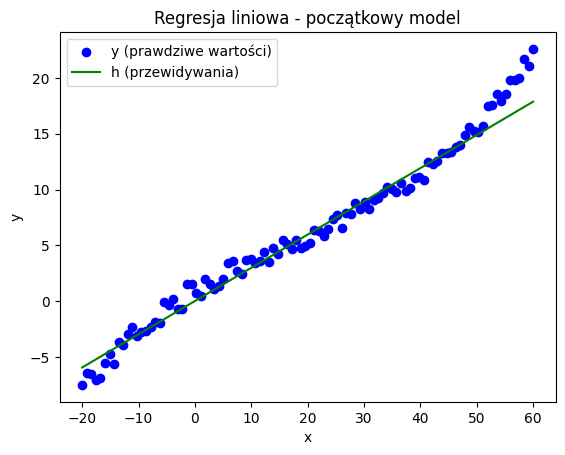

theta 0: 0.006264934781938791 
theta 1: 0.29789024591445923 
cost value: 0.7837742567062378


In [159]:

def find_gradient(eps,x, y, theta_0, theta_1):
    m = len(x)
    cost = calculate_cost(x, y, theta_0, theta_1)
    prev_cost = float('inf')
    while(abs(prev_cost - cost) > eps):
        gradient_theta_0 = (1/m)*np.sum(h_fun(x,theta_0,theta_1)-y)
        gradient_theta_1 = (1/m) * np.sum((h_fun(x, theta_0, theta_1) - y) * x)

    
        # Aktualizacja
        theta_0 = theta_0 - alpha * gradient_theta_0
        theta_1 = theta_1 - alpha * gradient_theta_1

        prev_cost = cost
        cost = calculate_cost(x, y, theta_0, theta_1)
        return theta_0,theta_1

   
theta_0,theta_1 = find_gradient(eps,x, y, theta_0, theta_1)

# Tworzenie wykresu
plot(x,y,theta_0,theta_1)

print(f"theta 0: {theta_0} ")
print(f"theta 1: {theta_1} ")

cost = calculate_cost(x, y, theta_0, theta_1)
print(f'cost value: {cost}')

***Regresja liniowa wielu zmiennych***

In [160]:
X = np.vstack([np.ones(x.shape), x])
y.shape = [1, -1]

y.shape = (1, 100)
X.shape = (2, 100)

def h_fun(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return np.dot(theta.T, X)
 
def calculate_cost(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    m = y.shape[1]

    cost = (1/(2*m))*np.sum((h_fun(X,theta)-y)**2)
    return cost

theta = np.array([[0], [0]])

def find_gradient(eps,X, y, theta, alpha):
    
    m = y.shape[1]
    cost = calculate_cost(X, y, theta)
    prev_cost = float('inf')

    while(abs(prev_cost - cost) > eps):
        gradient_theta = (1/m)*np.dot(X,(h_fun(X,theta)-y).T)
    
        # Aktualizacja
        theta = theta - alpha * gradient_theta


        prev_cost = cost
        cost = calculate_cost(X, y, theta)
        return theta

theta_opt = find_gradient(eps,X, y, theta, alpha)
print("Optymalne wartości theta:", theta_opt)


Optymalne wartości theta: [[0.00626493]
 [0.29789024]]


In [161]:
import numpy as np
import csv

# Wczytanie danych z pliku housing.txt
with open('./housing.txt', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data2 = [row for row in csvreader]
    data2 = np.array(data2, dtype=np.float32)

# Przygotowanie macierzy cech X i wyników y
y = data2[:, 2]  # Cena nieruchomości
y.shape = (1, y.shape[0])  # Konwersja do macierzy (1, m)

X = data2[:, 0:2]  # Liczba pokoi + powierzchnia
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1).T  # Dodanie biasu i transpozycja

# Normalizacja cech
y_scale = y.max()
y = y / y_scale  # Skalowanie y

X_scale = X.max(axis=1).reshape(-1, 1)  # Maksymalne wartości dla każdej cechy
X = X / X_scale  # Skalowanie X

# Definicja funkcji regresji liniowej
def h_fun(X, theta):
    """ Oblicza wartości regresji liniowej """
    return np.dot(theta.T, X)  # Mnożenie macierzowe

# Definicja funkcji kosztu
def calculate_cost(X, y, theta):
    """ Oblicza wartość funkcji kosztu J(theta) """
    m = y.shape[1]
    cost = (1 / (2 * m)) * np.sum((h_fun(X, theta) - y) ** 2)
    return cost

# Definicja funkcji gradientu prostego
def find_gradient(eps, X, y, theta, alpha):
    """ Implementacja algorytmu gradientu prostego """
    m = y.shape[1]
    cost = calculate_cost(X, y, theta)
    prev_cost = float('inf')

    while abs(prev_cost - cost) > eps:
        gradient_theta = (1/m) * np.dot(X, (h_fun(X, theta) - y).T)
        theta = theta - alpha * gradient_theta  # Aktualizacja wag
        prev_cost = cost
        cost = calculate_cost(X, y, theta)

    return theta

# Inicjalizacja parametrów modelu
theta = np.zeros((X.shape[0], 1))  # Wektor theta o wymiarze (n+1, 1)
eps = 1e-5  # Warunek stopu dla gradientu
alpha = 0.001  # Learning rate

# Trenowanie modelu
theta_opt = find_gradient(eps, X, y, theta, alpha)

# Przewidywanie ceny dla przykładowej nieruchomości
example = np.array([[1, 1300, 4]]).T  # Przykładowe dane (bias, powierzchnia, pokoje)
h_example = (theta_opt.T @ (example / X_scale)) * y_scale  # Przewidywana cena

# Wyniki końcowe
print(f"Optymalne wartości theta:\n{theta_opt}")
print(f"Koszt nieruchomości o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]:.2f}")



Optymalne wartości theta:
[[0.24937951]
 [0.13701888]
 [0.16736231]]
Koszt nieruchomości o pow. 1300 z l. pok. 4 oszacowany na 296090.64


***Regresja wielomianowa***

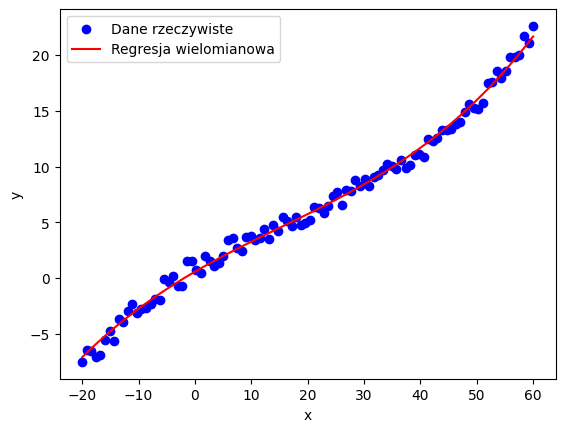

Optymalne wartości theta:
[[ 0.02528658]
 [ 0.77921902]
 [-0.49718083]
 [ 0.65075679]]


In [ ]:
# 
with open('./measurements.csv', 'r') as f:  
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)

#  Przygotowanie macierzy cech X i wyników y
y = data[:, 1]  
y.shape = (1, y.shape[0])  

x = data[:, 0]  
X = np.vstack([np.ones(x.shape), x, x**2, x**3])  

#  Normalizacja cech 
X_scale = X.max(axis=1)
X_scale.shape = [-1, 1]
X = X / X_scale  # Skalowanie X

y.shape = [1, -1]
y_scale = y.max()
y = y / y_scale


#  Inicjalizacja parametrów modelu
eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

y.shape = (1, 100)
X.shape = (4, 100)
theta.shape = (4, 1)

#  Trenowanie modelu
theta = find_gradient(eps, X, y, theta, alpha)

#  Wykres dopasowania modelu
plt.scatter(x, y * y_scale, color="blue", label="Dane rzeczywiste")  # Oryginalne wartości

# Obliczenie wartości przewidywanych
X_pred = np.vstack([np.ones(x.shape), x, x**2, x**3]) / X_scale  # Normalizacja
y_pred = h_fun(X_pred, theta) * y_scale  # Przewidywane wartości

plt.plot(x, y_pred.flatten(), color="red", label="Regresja wielomianowa")  # Krzywa regresji
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

#  Wyniki końcowe
print(f"Optymalne wartości theta:\n{theta}")
